In [1]:
inst = 1
field = 'SWIRE'
quad = 'A'
datadir='../../doc/20170617_Stacking/maps/PanSTARRScats/'

df_origin = pd.read_csv(datadir + 'SWIRE_'+quad+'.csv',low_memory=False)

In [2]:
df_origin.head()

,ra,dec,x,y,yminMag,ymin_col,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,...,iMeanKronMag,zMeanKronMag,yMeanKronMag,gMeanApMag,rMeanApMag,iMeanApMag,zMeanApMag,yMeanApMag,qualityFlag,objInfoFlag
0,241.093416,55.335304,210.617637,1015.955854,6.49163,yMeanPSFMag,-999.00000,-999.00000,-999.0,-999.00000,...,-999.0,-999.000,12.9557,-999.0000,-999.0000,-999.0,-999.0000,17.439899,32,268513280
1,242.573392,54.657916,570.523757,590.188120,6.90106,yMeanPSFMag,8.84053,8.17406,-999.0,-999.00000,...,-999.0,-999.000,10.4736,15.6011,15.3494,-999.0,-999.0000,13.094000,160,1343750144
2,242.573199,54.658166,570.394628,590.243651,7.00679,yMeanPSFMag,10.15500,-999.00000,-999.0,-999.00000,...,-999.0,-999.000,-999.0000,13.5589,-999.0000,-999.0,-999.0000,-999.000000,32,268959744
3,242.537149,54.359664,723.891114,602.907046,7.08880,yMeanPSFMag,-999.00000,-999.00000,-999.0,-999.00000,...,-999.0,-999.000,13.6783,-999.0000,-999.0000,-999.0,-999.0000,18.206600,32,268513280
4,244.272341,55.269016,255.160303,87.404797,7.53716,yMeanPSFMag,10.75600,9.50143,-999.0,8.16382,...,-999.0,11.075,10.1184,13.6847,13.8894,-999.0,14.5503,13.785300,32,268959744


In [4]:
Ntot = len(df_origin)
Npsf = len(df_origin[df_origin.yMeanPSFMag!=-999])
Nor = len(df_origin[(df_origin.yMeanPSFMag!=-999) | (df_origin.yMeanKronMag!=-999) | (df_origin.yMeanApMag!=-999)])
Nand = len(df_origin[(df_origin.yMeanPSFMag!=-999) & (df_origin.yMeanKronMag!=-999) & (df_origin.yMeanApMag!=-999)])

print('# tot = {}\n # has yPSFMag = {}\n # has at least one Mag = {}\n # has all 3 Mag = {}'\
      .format(Ntot,Npsf,Nor,Nand))


# tot = 1229661
 # has yPSFMag = 221381
 # has at least one Mag = 223517
 # has all 3 Mag = 97321


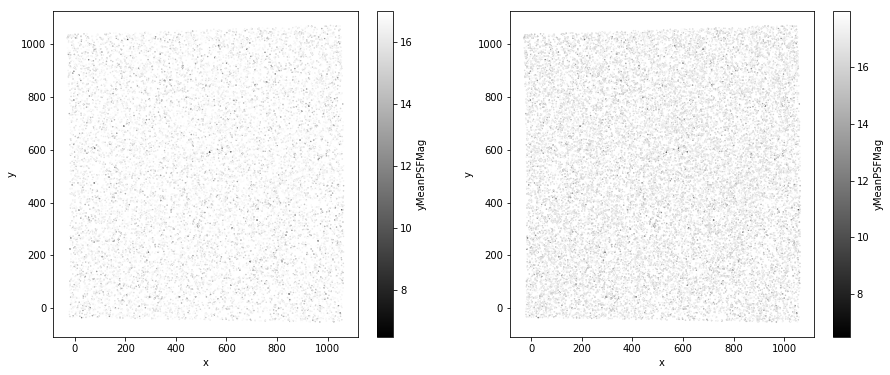

In [5]:
dfy17 = df_origin[(df_origin.yMeanPSFMag!=-999) & (df_origin.yMeanPSFMag<17)]
dfy18 = df_origin[(df_origin.yMeanPSFMag!=-999) & (df_origin.yMeanPSFMag<18)]
fig, axes = plt.subplots(1,2,figsize=(15,6))
dfy17.plot(kind='scatter',x='x',y='y',c='yMeanPSFMag',colormap='gray',s=1,marker='.',ax=axes[0])
dfy18.plot(kind='scatter',x='x',y='y',c='yMeanPSFMag',colormap='gray',s=1,marker='.',ax=axes[1])

In [6]:
df = df_origin.copy()

# Load 2M and UK cats

In [7]:
catcoorddir='../../doc/20170617_Stacking/maps/catcoord/TM'+str(inst)+'/'

fname=catcoorddir+'PSC/'+field+'_'+quad+'_2m_matched.txt'
tmdf=pd.read_csv(fname)

ukdfname = list(pd.read_csv(catcoorddir+'UKIDSS/'+field+'_'+quad+'_uk.txt',header=0,sep='|'))
ukdf = pd.read_csv(catcoorddir+'UKIDSS/'+field+'_'+quad+'_uk.txt',header=0,sep=',',names=ukdfname)

# select subsamples

In [8]:
tmdf = tmdf[(tmdf.x > -0.5) & (tmdf.x < 511.5) & (tmdf.y > -0.5) & (tmdf.y < 511.5)].copy()
df = df[(df.x > -0.5) & (df.x < 511.5) & (df.y > -0.5) & (df.y < 511.5) & (df.yMeanPSFMag!=-999)].copy()

### compare map with 2MASS

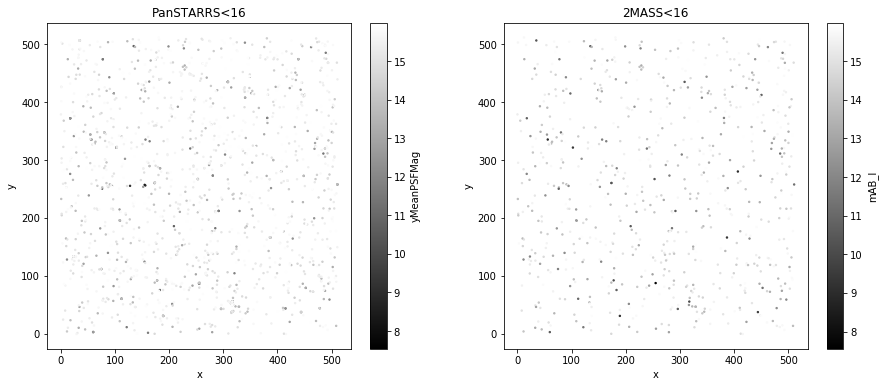

In [9]:
pltdf = df[(df.yMeanPSFMag!=-999) & (df.yMeanPSFMag<16)]
pltdftm = tmdf[tmdf.mAB_I<16]
fig, axes = plt.subplots(1,2,figsize=(15,6))
pltdf.plot(kind='scatter',x='x',y='y',c='yMeanPSFMag',colormap='gray',s=2,marker='o',ax=axes[0],\
           title='PanSTARRS<16')
pltdftm.plot(kind='scatter',x='x',y='y',c='mAB_I',colormap='gray',s=2,marker='o',ax=axes[1],\
             title='2MASS<16')

# Match coord to UKIDSS

In [11]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky

coorduk = SkyCoord(ra=ukdf['ra']*u.degree, dec=ukdf['dec']*u.degree, frame='icrs')
coordps = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')

idx, d2d,_ = match_coordinates_sky(coordps, coorduk)

In [25]:
df['uk_mAB_I'] = np.array(ukdf.iloc[idx].mAB_I)
df['dmatch_arcsec'] = d2d.arcsec
df['dm_y'] = df['yMeanPSFMag'] - df['uk_mAB_I']
df['mergedClass'] = np.array(ukdf.iloc[idx].mergedClass)
df['pstar'] = np.array(ukdf.iloc[idx].pstar)
df['pgalaxy'] = np.array(ukdf.iloc[idx].pgalaxy)
df['pnoise'] = np.array(ukdf.iloc[idx].pnoise)
df['psaturated'] = np.array(ukdf.iloc[idx].psaturated)

df=df.reset_index(drop=True)

In [26]:
df.head()

,ra,dec,x,y,yminMag,ymin_col,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,...,qualityFlag,objInfoFlag,uk_mAB_I,dmatch_arcsec,dm_y,mergedClass,pstar,pgalaxy,pnoise,psaturated
0,244.272341,55.269016,255.160303,87.404797,7.53716,yMeanPSFMag,10.756,9.50143,-999.000,8.16382,...,32,268959744,17.451,8.268832,-9.91384,1,0.050000,0.900000,0.050000,0.0
1,243.698214,55.466204,154.872565,256.976243,8.09103,yMeanPSFMag,-999.000,-999.00000,-999.000,-999.00000,...,32,268513280,21.649,2.191822,-13.55797,1,0.003067,0.993865,0.003067,0.0
2,243.701684,55.463715,156.153539,255.955404,8.94786,yMeanPSFMag,-999.000,-999.00000,-999.000,-999.00000,...,32,268959744,22.929,7.065941,-13.98114,1,0.050000,0.900000,0.050000,0.0
3,243.430510,55.657698,56.070832,335.302958,9.10400,yMeanPSFMag,10.409,9.67000,9.366,9.19900,...,168,1409359872,10.925,0.195305,-1.82100,-1,0.993865,0.003067,0.003067,0.0
4,243.617239,54.978434,406.707213,280.004144,9.14900,yMeanPSFMag,10.458,9.68000,9.395,9.25300,...,168,1409359872,12.005,0.124660,-2.85600,-1,0.993865,0.003067,0.003067,0.0


In [28]:
print(list(df))

['ra', 'dec', 'x', 'y', 'yminMag', 'ymin_col', 'gMeanPSFMag', 'rMeanPSFMag', 'iMeanPSFMag', 'zMeanPSFMag', 'yMeanPSFMag', 'gMeanKronMag', 'rMeanKronMag', 'iMeanKronMag', 'zMeanKronMag', 'yMeanKronMag', 'gMeanApMag', 'rMeanApMag', 'iMeanApMag', 'zMeanApMag', 'yMeanApMag', 'qualityFlag', 'objInfoFlag', 'uk_mAB_I', 'dmatch_arcsec', 'dm_y', 'mergedClass', 'pstar', 'pgalaxy', 'pnoise', 'psaturated']


In [34]:
df = df[['ra', 'dec', 'x', 'y', 'yminMag', 'uk_mAB_I', 'dmatch_arcsec', 'dm_y', 'mergedClass', \
        'pstar', 'pgalaxy', 'pnoise', 'psaturated','ymin_col', \
        'gMeanPSFMag', 'rMeanPSFMag', 'iMeanPSFMag', 'zMeanPSFMag', 'yMeanPSFMag', \
        'gMeanKronMag', 'rMeanKronMag', 'iMeanKronMag', 'zMeanKronMag', 'yMeanKronMag', \
        'gMeanApMag', 'rMeanApMag', 'iMeanApMag', 'zMeanApMag', 'yMeanApMag', \
        'qualityFlag', 'objInfoFlag']]

In [35]:
df.head()

,ra,dec,x,y,yminMag,uk_mAB_I,dmatch_arcsec,dm_y,mergedClass,pstar,...,iMeanKronMag,zMeanKronMag,yMeanKronMag,gMeanApMag,rMeanApMag,iMeanApMag,zMeanApMag,yMeanApMag,qualityFlag,objInfoFlag
0,244.272341,55.269016,255.160303,87.404797,7.53716,17.451,8.268832,-9.91384,1,0.050000,...,-999.0,11.075,10.118400,13.6847,13.8894,-999.0,14.5503,13.7853,32,268959744
1,243.698214,55.466204,154.872565,256.976243,8.09103,21.649,2.191822,-13.55797,1,0.003067,...,-999.0,-999.000,14.232600,-999.0000,-999.0000,-999.0,-999.0000,19.2026,32,268513280
2,243.701684,55.463715,156.153539,255.955404,8.94786,22.929,7.065941,-13.98114,1,0.050000,...,-999.0,-999.000,17.111601,-999.0000,-999.0000,-999.0,-999.0000,-999.0000,32,268959744
3,243.430510,55.657698,56.070832,335.302958,9.10400,10.925,0.195305,-1.82100,-1,0.993865,...,-999.0,-999.000,-999.000000,-999.0000,-999.0000,-999.0,-999.0000,-999.0000,168,1409359872
4,243.617239,54.978434,406.707213,280.004144,9.14900,12.005,0.124660,-2.85600,-1,0.993865,...,-999.0,-999.000,-999.000000,-999.0000,-999.0000,-999.0,-999.0000,-999.0000,168,1409359872


In [36]:
df.to_csv(datadir + 'SWIRE_'+quad+'_matched.csv',index=False)